<a href="https://colab.research.google.com/github/parvvaresh/machine-learning-algorithms-from-Scratch-/blob/main/machine-learning-algorithms-from-Scratch-/1%20-%20KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pandas.svg

numpy.svg

**Introduction**

The reason we find that much importance is given to classification algorithms and not much is given to regression algorithms is because a lot of problems faced during our daily routine belong to the classification task. For example, we would like to know whether a tumor is malignant or benign, we would like to know whether the product we sold was received positively or negatively by the consumers, etc. K nearest neighbors is another classification algorithm and it is very simple one too. If you are following this article after K means algorithm, don't get confused as these both belong to different domains of learning. K means is a clustering/unsupervised algorithm whereas K nearest neighbors is a classification/supervised learning algorithm.



---
**What is K??**

In K means algorithm, for each test data point, we would be looking at the K nearest training data points and take the most frequently occurring classes and assign that class to the test data. Therefore, K represents the number of training data points lying in proximity to the test data point which we are going to use to find the class.


---

**K Nearest Neighbours — Pseudocode**
1. Load the training and test data 
2. Choose the value of K 
3. For each point in test data:
       - find the Euclidean distance to all training data points
       - store the Euclidean distances in a list and sort it 
       - choose the first k points 
       - assign a class to the test point based on the majority of      classes present in the chosen points
4. End 


In [ ]:
import numpy as np

class KNN:
  def __init__(self, k = 3):
    self.k = k
  def distance_calculation(self, x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
  
  def fit(self, x, y):
    self.x_train = x
    self.y_train = y
  def predict(self, x_test):
    y_pred = [(self._predict(test)) for test in x_test]
    return np.array(y_pred)
  
  def _predict(self, X):
    distance = [(self.distance_calculation(train, X)) for train in self.x_train]

    index_sort = np.argsort(distance)[ : self.k]

    labels = [(self.y_train[index]) for index in index_sort]

    count_labels = {}

    for label in set(labels):
      count_labels.update({label : 0})

    for label in labels:
      count_labels[label] += 1
    count_labels = dict(sorted(count_labels.items(), key = lambda  item : item[1]))

    return list(count_labels.keys())[-1]
  def accuracy(self, y, y_pred):
    return np.sum(y == y_pred) / len(y)

For the test, he used **sklearn** data, which is related to flowers

For better understanding, we showed them as **data frames**


---


Click on the picture to download the dataset‌‌  : 


[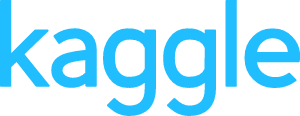](https://www.kaggle.com/datasets/saurabh00007/iriscsv)

In [ ]:
#load data
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
X, y = iris.data, iris.target

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


For better understanding, we categorized them based on 2 components

But basically we used all the components in our code
This was just to draw a diagram

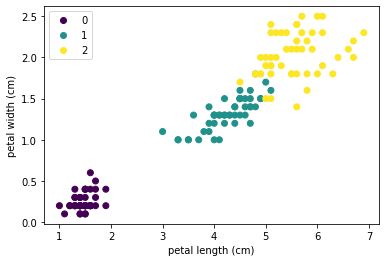

In [ ]:
import matplotlib.pyplot as plt

inv_name_dict = {
  0: 0,
  1: 1,
  2: 2
}

colors = [inv_name_dict[item] for item in iris_df['target']]
scatter = plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(handles= scatter.legend_elements()[0],
labels = inv_name_dict.keys())
plt.savefig("plot.png")
plt.show()

**Algorithm testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
)
model = KNN(3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("KNN classification accuracy", model.accuracy(y_test, predictions))

KNN classification accuracy 1.0
